In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [4]:
df = pd.read_csv('./Resources/all_songs_final.csv')
df.head()

,song,artist,year,peak-rank,weeks-on-board,track_id,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,billboard,decade
0,(1-2-3-4-5-6-7) Count The Days,Inez & Charlie Foxx,1968,76,5,4wXNtDvLZl55vlQashWQrI,0.686,0.562,5.0,-8.538,...,0.0504,0.589,0.000053,0.124,0.793,116.782,156886.0,4.0,1,1960s
1,(All Of A Sudden) My Heart Sings,Mel Carter,1965,38,7,6x5BiQwNlbtisITsEHa8Eu,0.419,0.546,7.0,-7.819,...,0.0363,0.479,0.000005,0.535,0.493,118.106,164067.0,3.0,1,1960s
2,(Baby) Hully Gully,The Olympics,1960,72,7,2CkbNJooPxUsHG4gFXKhxa,0.699,0.661,2.0,-6.090,...,0.0382,0.516,0.000000,0.198,0.869,115.772,218642.0,4.0,1,1960s
3,(Come round Here) Im The One You Need,The Miracles,1966,17,9,5YvokzRkNONpj5c0TIqTjQ,0.545,0.607,0.0,-9.525,...,0.0347,0.242,0.000000,0.779,0.767,113.880,150067.0,4.0,1,1960s
4,(Dance The) Mess Around,Chubby Checker,1961,24,7,58EirkLFB6O6wwRN9JowHB,0.511,0.694,10.0,-5.509,...,0.0479,0.381,0.000000,0.195,0.826,146.559,132933.0,4.0,1,1960s


In [7]:
df1960s = df[df['decade']=='1960s']
df1970s = df[df['decade']=='1970s']
df1980s = df[df['decade']=='1980s']
df1990s = df[df['decade']=='1990s']
df2000s = df[df['decade']=='2000s']
df2010s = df[df['decade']=='2010s']


In [14]:
df = df1960s

In [15]:
data60s = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature']]
data60s.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.686,0.562,5.0,-8.538,1.0,0.0504,0.589,0.000053,0.124,0.793,116.782,156886.0,4.0
1,0.419,0.546,7.0,-7.819,1.0,0.0363,0.479,0.000005,0.535,0.493,118.106,164067.0,3.0
2,0.699,0.661,2.0,-6.090,1.0,0.0382,0.516,0.000000,0.198,0.869,115.772,218642.0,4.0
3,0.545,0.607,0.0,-9.525,1.0,0.0347,0.242,0.000000,0.779,0.767,113.880,150067.0,4.0
4,0.511,0.694,10.0,-5.509,1.0,0.0479,0.381,0.000000,0.195,0.826,146.559,132933.0,4.0


In [16]:
data = data60s

In [17]:
target = df["billboard"]
target_names = ["hit", "not_a_hit"]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Support vector machine linear classifier
from sklearn.svm import SVC 

modelsc = SVC(kernel='linear', probability=True)
modelsc.fit(X_train_scaled, y_train)

SVC(kernel='linear', probability=True)

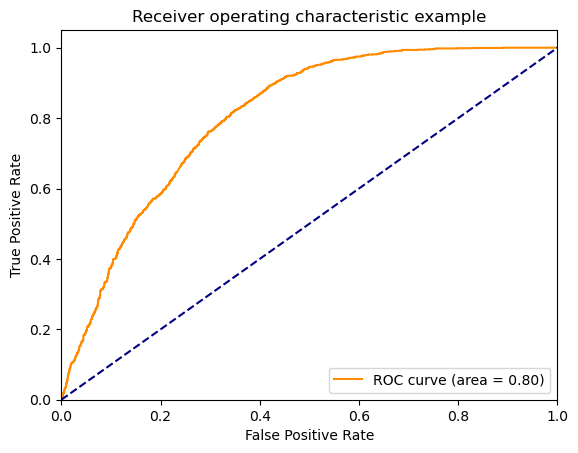

In [27]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_pred_proba = modelsc.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [29]:
# Model Accuracy
print('Scaled Test Acc: %.3f' % modelsc.score(X_test_scaled, y_test))
y_true = y_test
y_pred = modelsc.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm


Scaled Test Acc: 0.725


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([[2172,    0],
       [1439,    0]])

In [24]:
y_predsc = modelsc.predict(X_test_scaled)
cm = confusion_matrix(y_true, y_predsc)
cm

array([[1578,  594],
       [ 400, 1039]])

In [26]:
from sklearn.metrics import classification_report
predictions = modelsc.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

         hit       0.80      0.73      0.76      2172
   not_a_hit       0.64      0.72      0.68      1439

    accuracy                           0.72      3611
   macro avg       0.72      0.72      0.72      3611
weighted avg       0.73      0.72      0.73      3611



In [35]:
df = pd.DataFrame({'actual': y_test, 'predictions': predictions})

In [37]:
df

,actual,predictions
4417,1,1
907,1,1
2859,1,1
5836,1,1
2715,1,1
...,...,...
685758,0,0
5333,1,0
677670,0,0
405040,0,0
